In [51]:
# download link CIFAR10 Datset ("https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz")
# URL Link CIFAR10 Dataset ("https://www.cs.toronto.edu/~kriz/cifar.html")

In [1]:
#importing librararies
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


In [3]:
# Flatten the labels to 1D arrays
y_train = y_train.flatten()
y_test = y_test.flatten()

In [4]:
# Splitting data into 80% to test and 20% to train
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Checking the shapes of the arrays
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40000, 32, 32, 3)
y_train shape: (40000,)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000,)


In [7]:
y_train[:5]


array([6, 2, 5, 6, 3], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [27]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

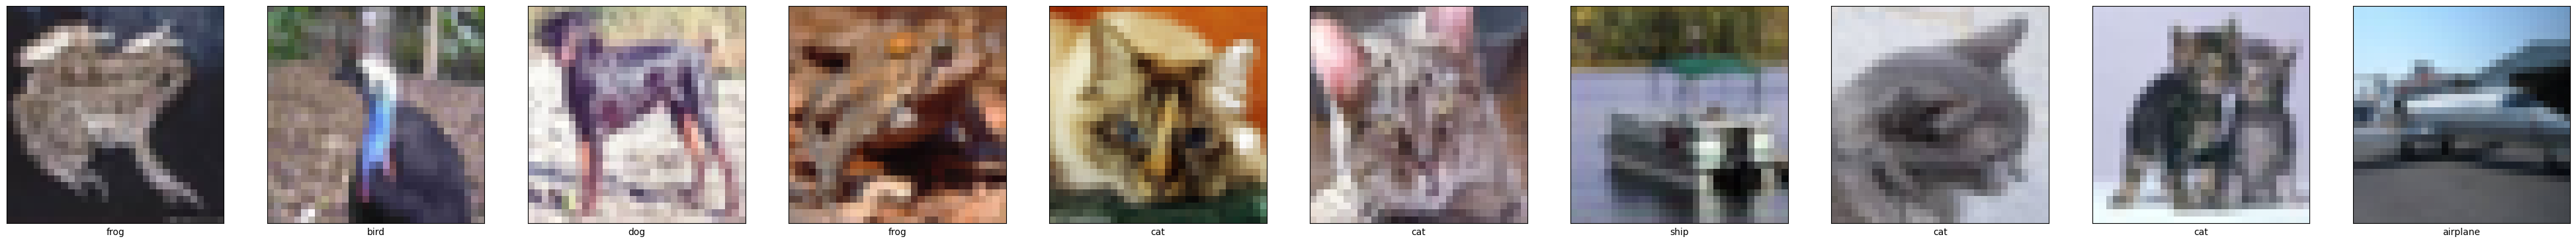

In [28]:
def plot_samples(X, y, num_samples=10):
    plt.figure(figsize=(50, 50))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i])
        plt.xlabel(classes[y[i]])
        plt.xticks([])  # Remove x-axis ticks
        plt.yticks([])  # Remove y-axis ticks
    plt.show()

# class_label = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

# Plot the first ten samples from the training set.

plot_samples(X_train, y_train, num_samples=10)


In [17]:
# Normalisation of training data
X_train = X_train / 255.0
X_test = X_test / 255.0


In [18]:
# Basic artificial neural network for picture classification.
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1250/1250 [==============================] - 117s 93ms/step - loss: 1.8398 - accuracy: 0.3427
Epoch 2/5
1250/1250 [==============================] - 110s 88ms/step - loss: 1.6553 - accuracy: 0.4173
Epoch 3/5
1250/1250 [==============================] - 109s 87ms/step - loss: 1.5716 - accuracy: 0.4453
Epoch 4/5
1250/1250 [==============================] - 106s 85ms/step - loss: 1.5083 - accuracy: 0.4697
Epoch 5/5
1250/1250 [==============================] - 111s 88ms/step - loss: 1.4608 - accuracy: 0.4863


In [19]:
#Building CNN Network
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 49s 38ms/step - loss: 1.5167 - accuracy: 0.4552
Epoch 2/10
1250/1250 [==============================] - 48s 38ms/step - loss: 1.1531 - accuracy: 0.5964
Epoch 3/10
1250/1250 [==============================] - 48s 39ms/step - loss: 1.0138 - accuracy: 0.6477
Epoch 4/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.9281 - accuracy: 0.6738
Epoch 5/10
1250/1250 [==============================] - 48s 38ms/step - loss: 0.8555 - accuracy: 0.7012
Epoch 6/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.7994 - accuracy: 0.7223
Epoch 7/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.7503 - accuracy: 0.7379
Epoch 8/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.6958 - accuracy: 0.7560
Epoch 9/10
1250/1250 [==============================] - 47s 37ms/step - loss: 0.6522 - accuracy: 0.7717
Epoch 10/10
1250/1250 [==============================] - 46s 37m

In [ ]:
#At the end of 5 epochs, CNN's accuracy was over 70%, which is a huge improvement
# above ANN. CNNs are the most accurate image categorization algorithms.
# Also, as compared to simple ANN, computation is substantially lower because maxpooling reduces image size while keeping features.

In [22]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 5s 15ms/step - loss: 0.9301 - accuracy: 0.6938


[0.9301208853721619, 0.6937999725341797]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:10]


313/313 [==============================] - 4s 12ms/step


array([[1.84669010e-02, 5.01305051e-03, 3.07395845e-03, 5.63259304e-01,
        3.50009948e-01, 3.35811600e-02, 6.08282244e-06, 1.33516965e-02,
        1.11181373e-02, 2.11966340e-03],
       [2.58474669e-04, 1.29770615e-05, 4.81827419e-06, 3.44117252e-05,
        8.98960764e-08, 4.71259227e-06, 6.54337327e-06, 6.58370595e-07,
        9.99553502e-01, 1.23775157e-04],
       [7.84545720e-01, 2.84465466e-04, 1.09246718e-02, 1.26568601e-03,
        3.33501701e-03, 8.02197959e-04, 4.63119941e-05, 6.21921863e-05,
        1.97741479e-01, 9.92245856e-04],
       [1.30004491e-05, 1.53899703e-06, 1.14089221e-01, 1.54203987e-02,
        2.00752884e-01, 6.10895036e-03, 6.62223876e-01, 1.96926908e-06,
        1.38808670e-03, 4.40802994e-09],
       [7.17432937e-04, 9.13169086e-02, 1.36310570e-02, 2.38785952e-01,
        1.56414062e-02, 4.33034450e-02, 5.76575637e-01, 1.56826223e-04,
        1.88514369e-03, 1.79862026e-02],
       [7.11988017e-04, 4.28795721e-03, 9.98944626e-04, 6.34815311e-03,
   

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]


[3, 8, 0, 6, 6, 6, 8, 0, 6, 6]

In [25]:
y_test[:10]

array([7, 8, 0, 6, 1, 6, 8, 0, 6, 5], dtype=uint8)

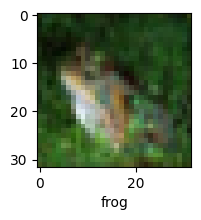

In [29]:
plot_sample(X_test, y_test,3)


In [31]:
classes[y_classes[3]]

'frog'

In [32]:
classes[y_classes[3]]

'frog'

1/1 [==============================] - 0s 21ms/step


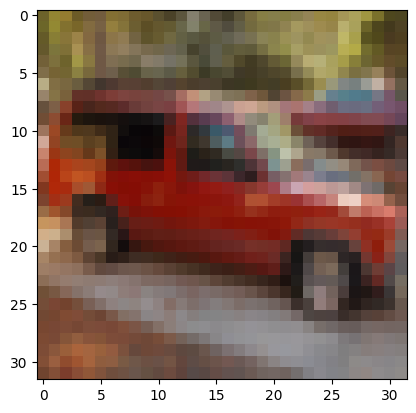

In [50]:
#Prediction
idx2 = random.randint(0, len(y_test))
plt.imshow(X_test[idx2, :])
y_pred = cnn.predict(X_test[idx2, :].reshape(1, 32, 32, 3))
